In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [21]:
dataset="SRdrift.csv"
risultati="SRdrift_risultati_50A_VV2.csv"
file_output_name="CM_SRdrift50A_VV2.pdf"

In [22]:
y_true=pd.read_csv(dataset ,usecols=["V"])
y_true.info()

y_predict=pd.read_csv(risultati, usecols=["y_pred"])
y_predict.info()
macroClassLabels=["0", "1"]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2049 entries, 0 to 2048
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   V       2049 non-null   int64
dtypes: int64(1)
memory usage: 16.1 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2049 entries, 0 to 2048
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   y_pred  2049 non-null   int64
dtypes: int64(1)
memory usage: 16.1 KB


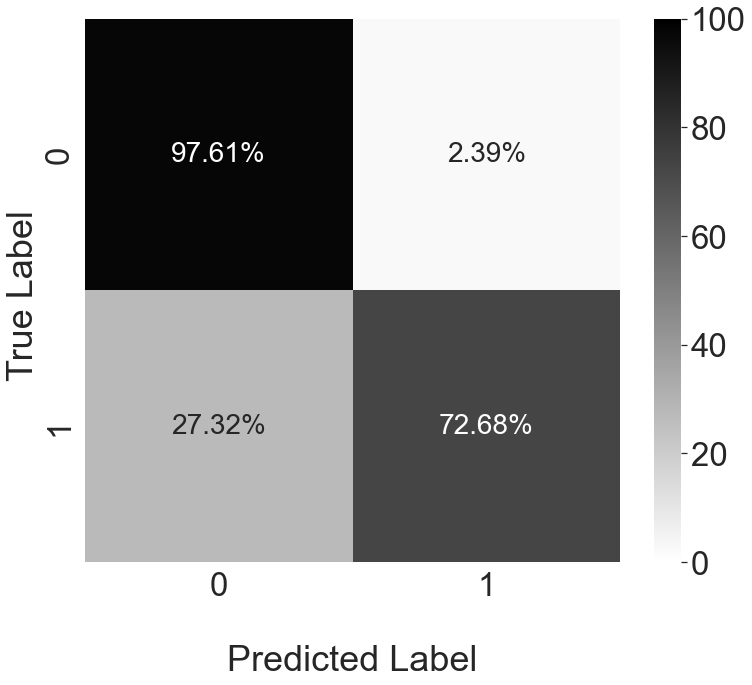

In [23]:
def normalizeCF(confMatrix):
    cf=[]
    for i in range(len(confMatrix)):
        subList=[]
        for j in range(len(confMatrix[i])):
            subList.append(confMatrix[i][j]/sum(confMatrix[i]))
        cf.append(subList)
    return cf

confMatrix=confusion_matrix(y_true,y_predict)
cfMyVoting=normalizeCF(confMatrix)
confMatrixLabel=macroClassLabels
confMatrixDf=pd.DataFrame(cfMyVoting, index=confMatrixLabel,columns=confMatrixLabel)

lab=[]
for i in confMatrixDf.multiply(100).to_numpy().tolist():
    sub=[]
    for j in i:
        sub.append(f"{round(j,2)}%")
    lab.append(sub)

heatmapMyVoting = sns.heatmap(confMatrixDf.multiply(100), annot=lab, fmt='',cmap="gray_r",annot_kws= {'size':28},cbar=True, vmin=0, vmax=100)
sns.set(rc = {'figure.figsize':(12,10)})
sns.set(font_scale=3)
#heatmapMyVoting.set_title('Seaborn Confusion Matrix\n\n')
heatmapMyVoting.set_xlabel('\nPredicted Label')
heatmapMyVoting.set_ylabel('True Label ')
#plt.xticks(rotation=45) 
#plt.title("Second layer Decision Tree confusion Matrix\n\n")
plt.savefig(file_output_name,bbox_inches="tight")
plt.show()